In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical

In [ ]:

# Step 1: Load and preprocess the dataset
df = pd.read_csv("LungCancerDataset.csv")  # Add path if needed


In [ ]:
# Encode categorical variables
# data=data.replace({'LUNG_CANCER': {'YES': 1, 'NO': 0}})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})


In [ ]:
# Split data into features and target
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']


In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Reshape data for CNN (add channel dimension)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


In [ ]:

# Step 2: Build the CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=12, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7243 - loss: 0.5318 - val_accuracy: 0.8586 - val_loss: 0.3491
Epoch 2/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8972 - loss: 0.2874 - val_accuracy: 0.8586 - val_loss: 0.2863
Epoch 3/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8923 - loss: 0.2336 - val_accuracy: 0.8788 - val_loss: 0.2325
Epoch 4/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8881 - loss: 0.2298 - val_accuracy: 0.9091 - val_loss: 0.1942
Epoch 5/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9206 - loss: 0.1845 - val_accuracy: 0.9495 - val_loss: 0.1771
Epoch 6/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9170 - loss: 0.1828 - val_accuracy: 0.9495 - val_loss: 0.1646
Epoch 7/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9182 - loss: 0.1976 - val_accuracy: 0.9495 - val_loss: 0.1625
Epoch 8/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9048 - loss: 0.1942 - val_accuracy: 0.9596 - val_loss

In [ ]:
# Step 4: Evaluate the model
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [ ]:
# Classification metrics
print(classification_report(y_test, y_pred, target_names=['No Cancer', 'Cancer']))


              precision    recall  f1-score   support

   No Cancer       0.72      0.72      0.72        18
      Cancer       0.95      0.95      0.95       106

    accuracy                           0.92       124
   macro avg       0.84      0.84      0.84       124
weighted avg       0.92      0.92      0.92       124



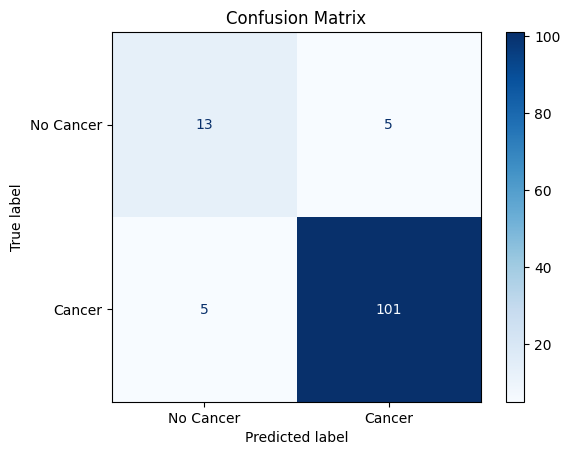

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()


<Figure size 1200x500 with 0 Axes>

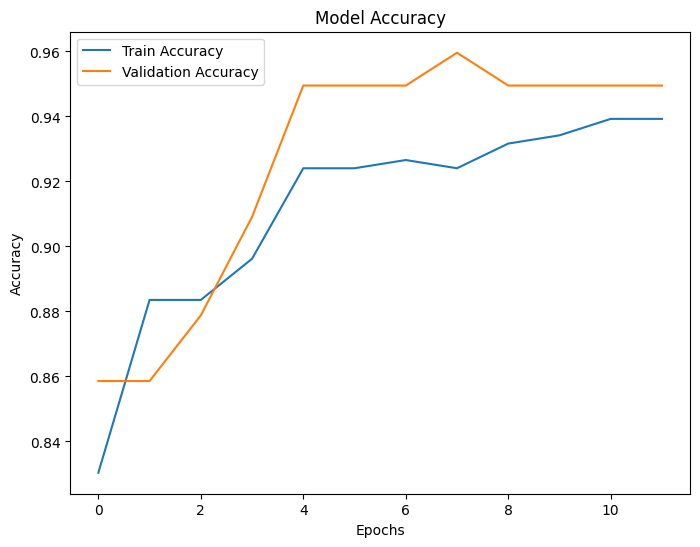

In [ ]:

# Step 5: Accuracy and Loss Graph
plt.figure(figsize=(12, 5))

# Accuracy Graph
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


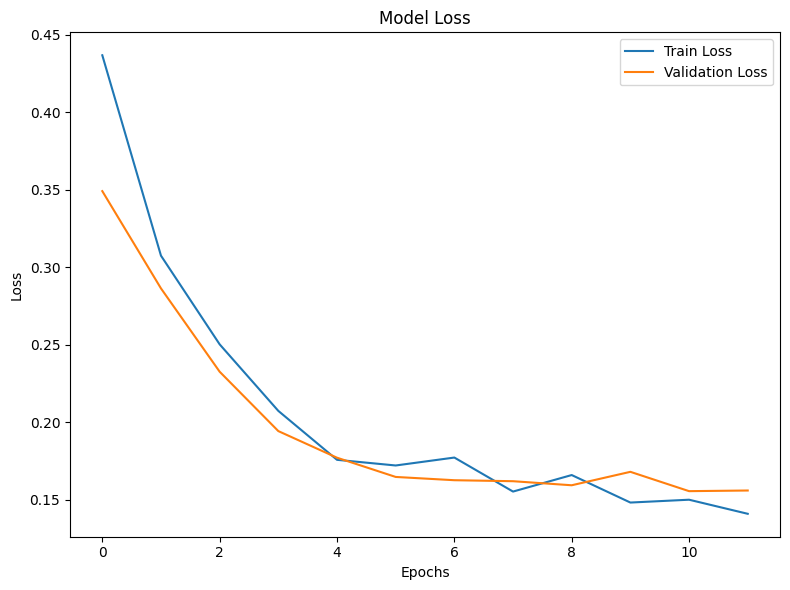

In [ ]:

# Loss Graph
#plt.subplot(1, 2, 2)
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy: 0.9193548387096774
Precision: 0.9528301886792453
Recall: 0.9528301886792453
F1 Score: 0.9528301886792453


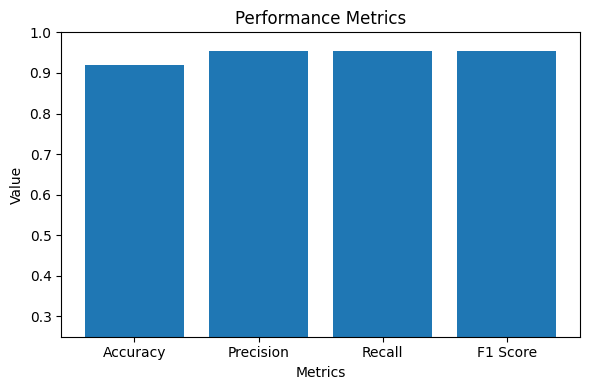

In [ ]:
# calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# metrics plotting
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# print metrics
for metric, value in metrics.items():
    print(f'{metric}: {value}')

# create dataframe
df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# plot metrics as bar chart
plt.figure(figsize=(6, 4))
plt.bar(df_metrics['Metric'], df_metrics['Value'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics')
plt.ylim(0.25, 1)
plt.tight_layout()
plt.show()




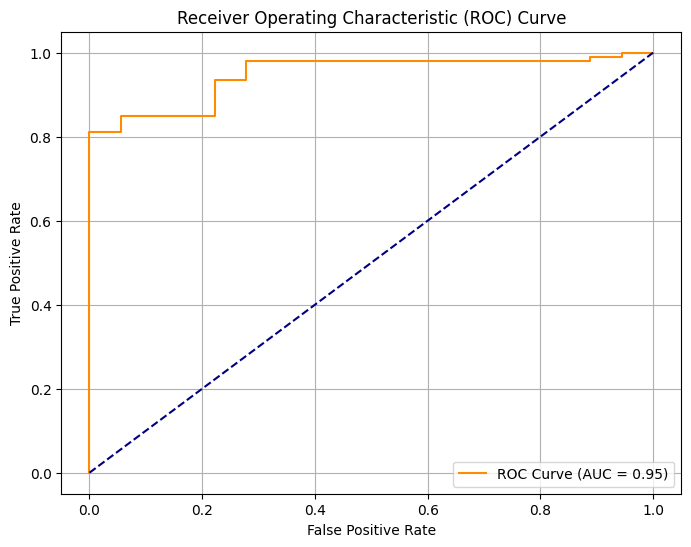

In [ ]:
# Step 7: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


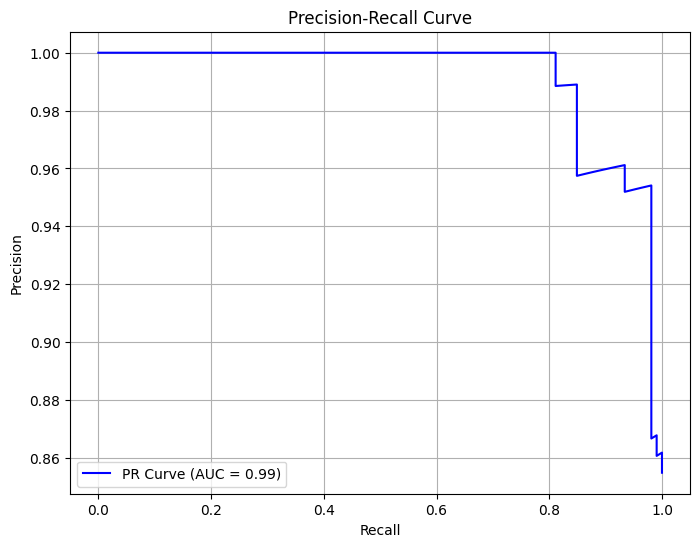

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute the Area Under the Curve (AUC) for Precision-Recall
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


Class 0:
  FPR (False Positive Rate): 0.0472
  FNR (False Negative Rate): 0.2778
Class 1:
  FPR (False Positive Rate): 0.2778
  FNR (False Negative Rate): 0.0472


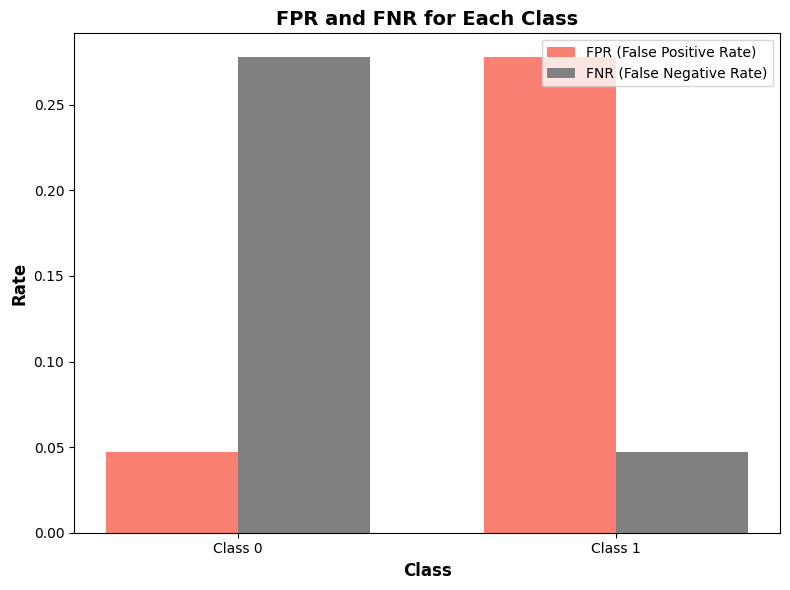

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
all_classes = [0, 1]
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Initialize arrays to store FPR and FNR
fpr = []
fnr = []

# Calculate FPR and FNR for each class
for i in range(len(all_classes)):
    TP = cm[i, i]  # True Positives
    FP = cm[:, i].sum() - TP  # False Positives
    FN = cm[i, :].sum() - TP  # False Negatives
    TN = cm.sum() - (TP + FP + FN)  # True Negatives

    # Compute FPR and FNR
    fpr_i = FP / (FP + TN) if (FP + TN) > 0 else 0
    fnr_i = FN / (FN + TP) if (FN + TP) > 0 else 0

    fpr.append(fpr_i)
    fnr.append(fnr_i)

# Print FPR and FNR for each class
for idx, class_label in enumerate(all_classes):
    print(f"Class {class_label}:")
    print(f"  FPR (False Positive Rate): {fpr[idx]:.4f}")
    print(f"  FNR (False Negative Rate): {fnr[idx]:.4f}")

# Save FPR and FNR to an Excel file
df = pd.DataFrame({
    'Class': all_classes,
    'FPR (False Positive Rate)': fpr,
    'FNR (False Negative Rate)': fnr
})
#df.to_excel('result/FPV_FNR.xlsx', index=False)

# Plotting FPR and FNR as a bar chart for each class
x_labels = [f"Class {class_label}" for class_label in all_classes]
x = np.arange(len(all_classes))  # Position for bars

# Bar width
bar_width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - bar_width / 2, fpr, bar_width, label='FPR (False Positive Rate)', color='salmon')
plt.bar(x + bar_width / 2, fnr, bar_width, label='FNR (False Negative Rate)', color='grey')

# Chart formatting
plt.title('FPR and FNR for Each Class', weight='bold', fontsize=14)
plt.xlabel('Class', weight='bold', fontsize=12)
plt.ylabel('Rate', weight='bold', fontsize=12)
plt.xticks(x, x_labels)
plt.legend()
plt.tight_layout()


plt.show()

